## Método das diferenças divididas

In [9]:
def dif_div(x: list, y: list)-> list:
    coeffs = [y[0]]
    n = len(x)
    for i in range(n - 1):
        for j in range(n - 1 - i):
            numer = y[j + 1] - y[j]
            denom = x[j + 1 + i] - x[j]
            y[j] = numer / denom
        coeffs.append(y[0])
    return coeffs
            

In [10]:
def build_poly(x, coeffs):
    n = len(x)
    def poly(t):
        soma = coeffs[0]
        for i in range(n - 1):
            parc = coeffs[i + 1]
            for j in range(i + 1):
                parc *= (t - x[j])
            soma += parc
        return soma
    return poly

## Exemplo 1

In [11]:
x = [0, 2, 4]
y = [2, 1, 2]
coeffs = dif_div(x, y) # isso altera y in-place

In [12]:
p = build_poly(x, coeffs)

In [13]:
p(0), p(2), p(4)

(2.0, 1.0, 2.0)

## gráfico do polinômio interpolador

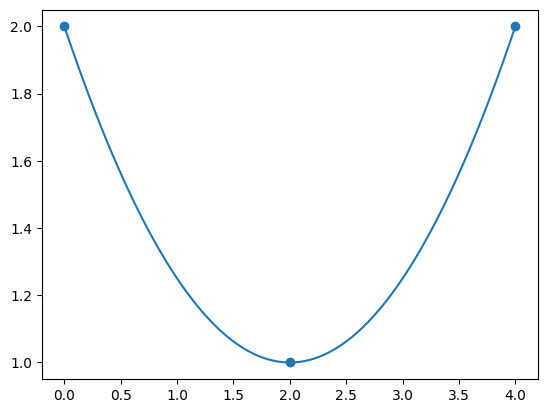

In [14]:
import numpy as np
import matplotlib.pyplot as plt

y = [2, 1, 2] # repetindo a definição, pois y foi alterado por dif_div

t = np.linspace(min(x), max(x), 200)
pt = [p(ti) for ti in t]

plt.scatter(x, y)
plt.plot(t, pt)

## Exemplo com mais pontos

In [15]:
n = 5
# valores de x em [a,b] random
a, b = 1, 6
x = a + (b - a) * np.random.random(n)
x.sort()
# valores de y em [c, d] random
c, d = 2, 5
y = c + (d - a) * np.random.random(n)
y_copy = [yi for yi in y]

coeffs = dif_div(x, y_copy)
p = build_poly(x, coeffs)

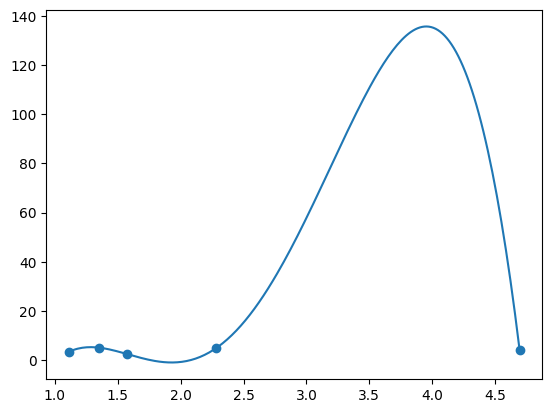

In [16]:
plt.scatter(x, y)
# gráfico do polinômio
t = np.linspace(min(x), max(x), 200)
pt = [p(ti) for ti in t]
plt.plot(t, pt)

## Interpolação de funções

In [26]:
import math

In [27]:
def f(x):
    return math.sqrt(1 + (x**2 + 1) * math.cos(x)**2)

In [101]:
x = np.linspace(0, 2, 50)
y = [f(xi) for xi in x]
y_copy = [yi for yi in y]

In [102]:
coeffs = dif_div(x, y_copy)

In [103]:
coeffs

[1.4142135623730951,
 -1.6015925125012487e-05,
 -0.0027399465769846203,
 -0.0571016450579854,
 -0.22480076331642812,
 0.06017384309211097,
 0.08805858910245948,
 -0.03251138572299196,
 -0.015309594821946286,
 0.021678729476070805,
 0.00028831814418624815,
 -0.008985112584209677,
 0.004786169057253492,
 0.0018320933800988419,
 -0.003408480835733318,
 0.000976326434248432,
 0.0011962303814700502,
 -0.0034288663959376247,
 0.008300295585426314,
 -0.02292246639511676,
 0.058449353422642895,
 -0.13564598992803248,
 0.29289841437255154,
 -0.6025591828597793,
 1.2092585510987277,
 -2.405789787602846,
 4.775965574370151,
 -9.412643032178348,
 18.18789633520243,
 -33.98515470649088,
 60.71613630357281,
 -102.92165423113065,
 164.79757902130632,
 -248.67694373977366,
 353.3214893365036,
 -472.6086810982666,
 595.3086048564196,
 -706.5093795049555,
 790.5961672314668,
 -835.0075658594421,
 833.868731207114,
 -790.381247915713,
 716.5032370333569,
 -629.772967407452,
 549.6263670789443,
 -495.0212

# plotando o exemplo

In [104]:
p = build_poly(x, coeffs)

In [105]:
t = np.linspace(min(x), max(x),200)

In [106]:
ft = [f(ti) for ti in t]
pt = [p(ti) for ti in t]

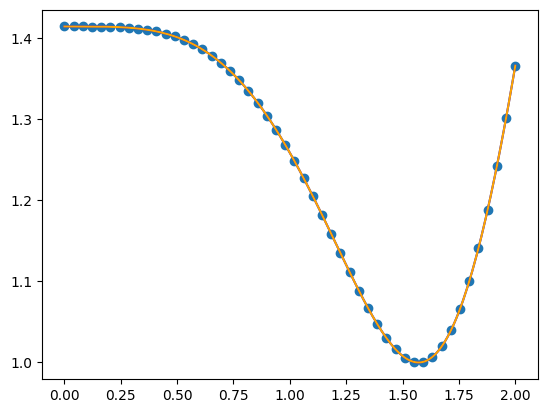

In [107]:
plt.plot(t, ft, color="blue")
plt.scatter(x, y)
plt.plot(t, pt, color="orange")

In [108]:
# aumentar o número de pontos na interpolação
# não melhora a aproximação do gráfico da função
# pelo polinômio interpolador
# (esse é o Fenômeno de Runge).